# Error Correction 

# 1.Bit-Flip-Code

Figure(556.56x367.889)
Result: {'111': 1024}


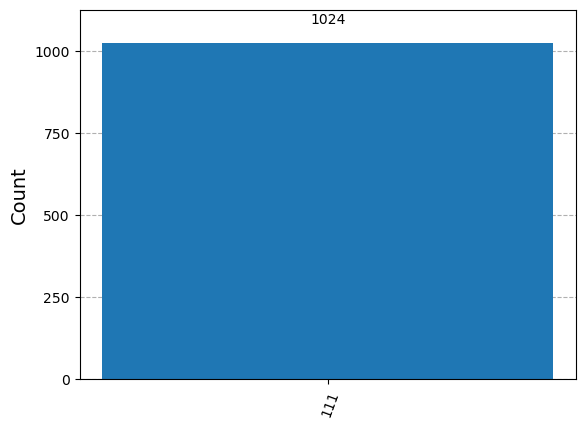

In [2]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
# Defining the number of qubits 
n = 3
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr, cr)

# Applying NOT gate and assuming that the 2nd qubit has flip from |1> to |0> 
qc.x(0)
qc.x(1)

# Applying CCNOT gate
qc.ccx(0,1,2) 

# Measure the qubits
qc.measure(qr, cr)

# Draw the circuit
print(qc.draw('mpl'))

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=1024)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)


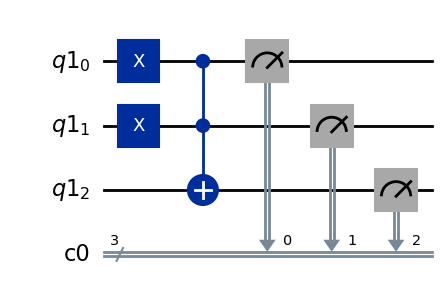

In [4]:
qc.draw('mpl')

Result: {'000': 1024}


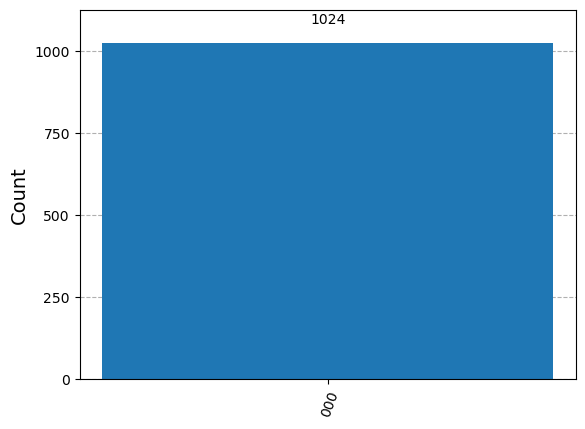

In [6]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

barriers = True

def bit_flip_code():
    # Create a quantum circuit with 6 qubits and 4 classical bits
    qr = QuantumRegister(6)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    if barriers:
        qc.barrier()

    # Introduce a bit flip error on any of the qubit (for demonstration)
    qc.x(qr[0]) # or apply qc.x(qr[0]) and qc.x(qr[2]) to obtain 111
    
    if barriers:
        qc.barrier()

    # Syndrome measurement
    qc.cx(qr[0], qr[3])
    qc.cx(qr[1], qr[3])
    qc.measure(qr[3], cr[0])
    qc.cx(qr[1], qr[4])
    qc.cx(qr[2], qr[4])
    qc.measure(qr[4], cr[1])

    if barriers:
        qc.barrier()

    # AND gate logic for combining conditions
    qc.ccx(qr[3], qr[4], qr[5])  # Use qubit 5 to store the AND result
    qc.measure(qr[5], cr[2])
    
    if barriers:
        qc.barrier()

    # Error correction using combined condition
    with qc.if_test((cr[2], 1)):
        qc.x(qr[1])
    with qc.if_test((cr[2], 0)):
        qc.x(qr[0])
    
    if barriers:
        qc.barrier()

    # Measure the logical qubit
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])

    return qc
    
# Create and execute the bit flip error correction circuit
qc = bit_flip_code()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=1024)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)

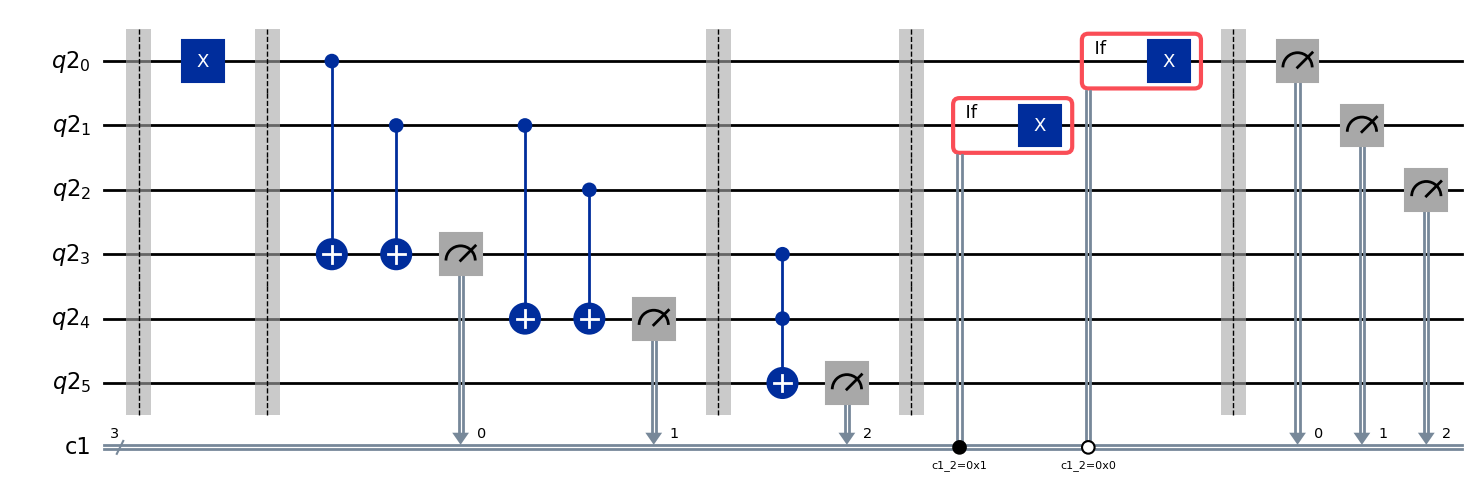

In [8]:
qc.draw('mpl')

# A simulation on Quirk(on the given link below)

# see https://bit.ly/3EyuBMK

# 2.Phase-Flip Code

Result: {'101': 373, '010': 417, '000': 358, '001': 356, '110': 388, '100': 418, '111': 381, '011': 381}


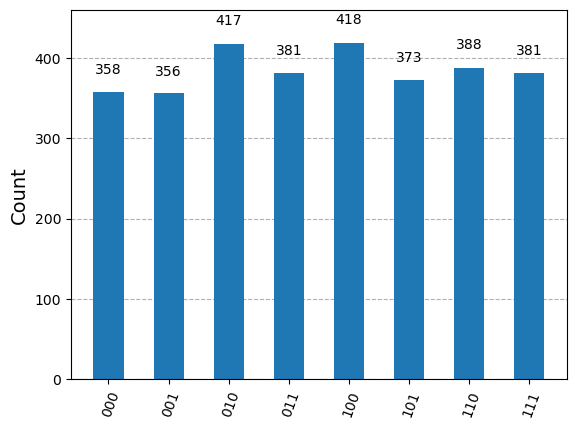

In [12]:
# importing the necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

barriers = True

def bit_phase_code():
    # Create a quantum circuit with 6 qubits and 4 classical bits
    qr = QuantumRegister(6)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    if barriers:
        qc.barrier()

    # Introduce a bit flip error on any of the qubit (for demonstration)
    qc.x(qr[0]) # flipping the bit to |1> 

    if barriers:
        qc.barrier()
        
    #Applying Hadamard gate to the first 3 qubits 
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    
    if barriers:
        qc.barrier()
        
    #Cancelling the effect of the phase
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    
    if barriers:
        qc.barrier()

    # Syndrome measurement
    qc.cx(qr[0], qr[3])
    qc.cx(qr[1], qr[3])
    qc.measure(qr[3], cr[0])
    qc.cx(qr[1], qr[4])
    qc.cx(qr[2], qr[4])
    qc.measure(qr[4], cr[1])

    if barriers:
        qc.barrier()

    # AND gate logic for combining conditions
    qc.ccx(qr[3], qr[4], qr[5])  # Use qubit 5 to store the AND result
    qc.measure(qr[5], cr[2])

    if barriers:
        qc.barrier()
        
    # Applying Hadamard gate to the first 3 qubits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    
    if barriers:
        qc.barrier()
    
    # Error correction using combined condition
    with qc.if_test((cr[2], 1)):
        qc.z(qr[1])
    with qc.if_test((cr[2], 0)):
        qc.z(qr[0])

    if barriers:
        qc.barrier()

    # Measure the logical qubit
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    
    return qc
    
# Create and execute the bit flip error correction circuit
qc = bit_phase_code()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=3072)
result = job.result()
counts = result.get_counts()

# Display the result
print("Result:", counts)
plot_histogram(counts)

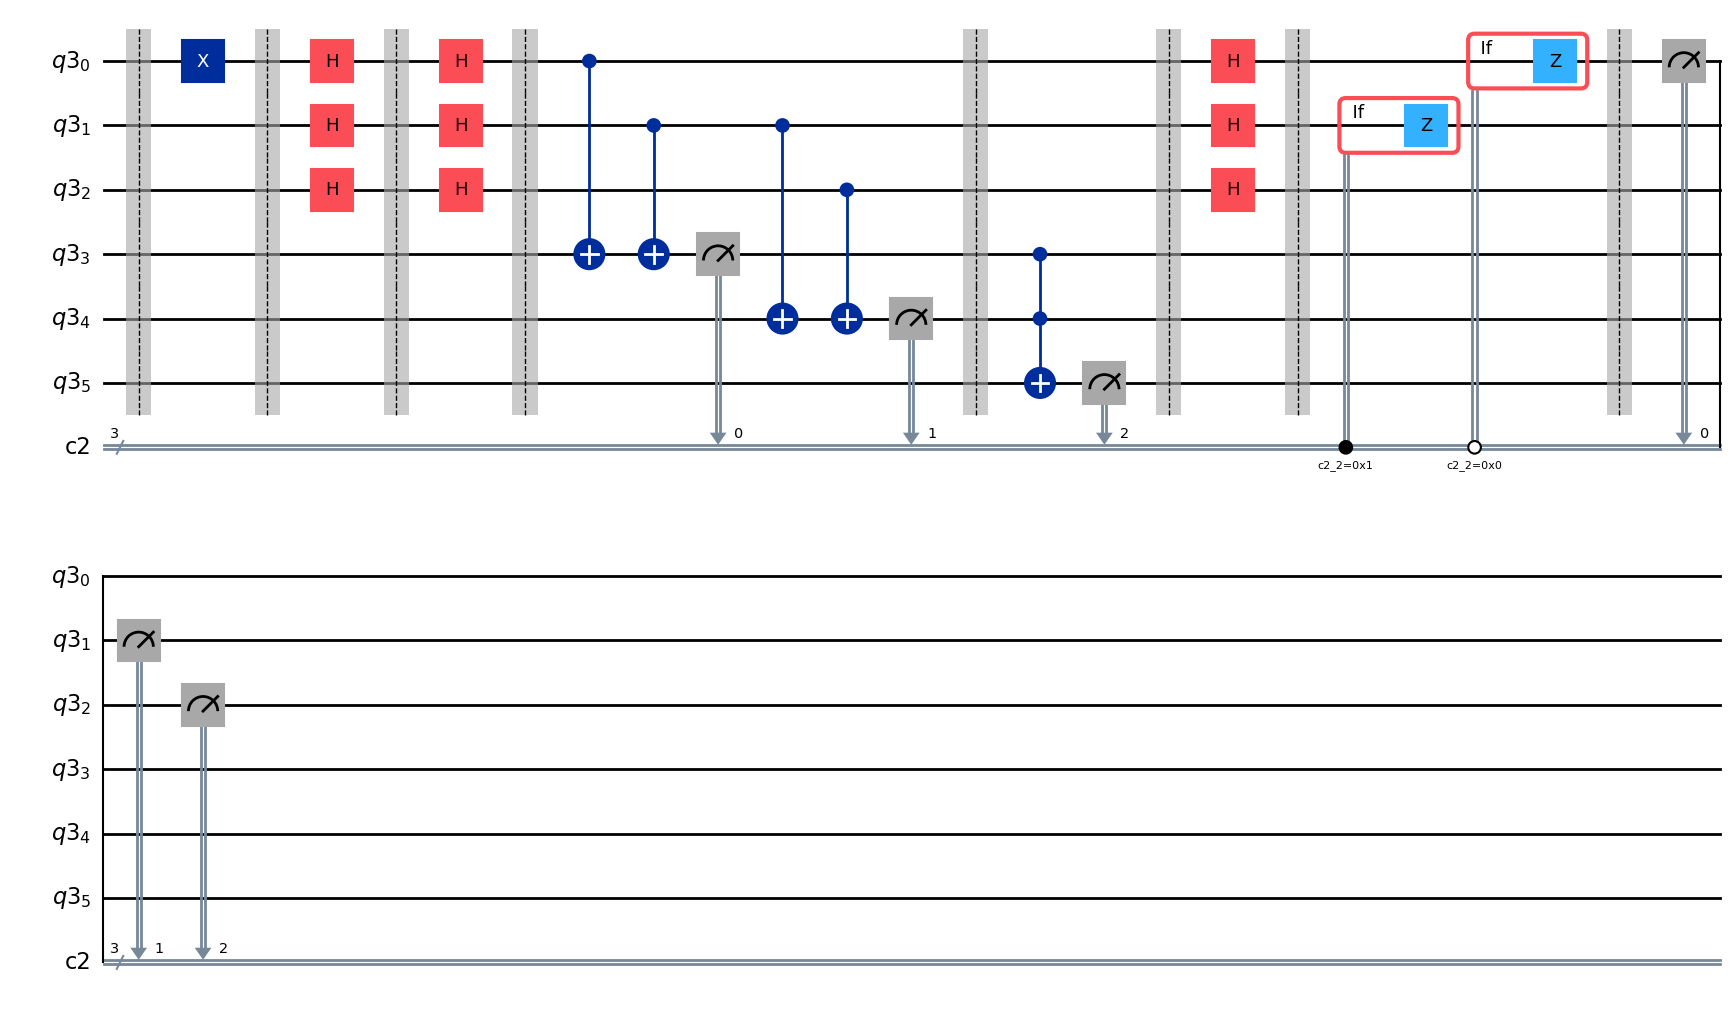

In [14]:
qc.draw('mpl')

 # Simulating this in Quirk https://bit.ly/3e7dNQR